In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataframe = pd.read_csv('vehiculos.csv')

In [6]:
dataframe.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus


In [8]:
dataframe['vehicle_class'].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [9]:
y = dataframe['vehicle_class']
X = dataframe.drop('vehicle_class', axis=1)

In [11]:
y

0       van
1       van
2      saab
3       van
4       bus
       ... 
841    saab
842     van
843    saab
844    saab
845     van
Name: vehicle_class, Length: 846, dtype: object

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=45 )

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
predicciones = knn.predict(X_test)

In [24]:
predicciones

array(['saab', 'opel', 'saab', 'opel', 'saab', 'van', 'saab', 'opel',
       'saab', 'van', 'opel', 'bus', 'van', 'opel', 'opel', 'van', 'opel',
       'saab', 'bus', 'saab', 'bus', 'bus', 'bus', 'bus', 'bus', 'bus',
       'opel', 'saab', 'van', 'bus', 'opel', 'opel', 'bus', 'saab',
       'opel', 'bus', 'van', 'bus', 'bus', 'van', 'van', 'opel', 'opel',
       'bus', 'saab', 'van', 'bus', 'bus', 'opel', 'bus', 'bus', 'saab',
       'opel', 'van', 'bus', 'saab', 'saab', 'bus', 'saab', 'opel', 'van',
       'van', 'bus', 'bus', 'saab', 'van', 'bus', 'bus', 'van', 'saab',
       'van', 'bus', 'opel', 'van', 'opel', 'van', 'saab', 'saab', 'bus',
       'bus', 'van', 'saab', 'saab', 'van', 'bus', 'bus', 'saab', 'saab',
       'saab', 'van', 'van', 'van', 'van', 'saab', 'saab', 'saab', 'saab',
       'opel', 'opel', 'saab', 'bus', 'bus', 'bus', 'saab', 'van', 'bus',
       'saab', 'saab', 'saab', 'bus', 'van', 'bus', 'opel', 'bus', 'saab',
       'saab', 'opel', 'van', 'opel', 'opel', 'bus

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predicciones))

[[65  0  7  5]
 [ 7 24 28  6]
 [ 5 26 23  3]
 [ 2  0  2 51]]


In [27]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

         bus       0.82      0.84      0.83        77
        opel       0.48      0.37      0.42        65
        saab       0.38      0.40      0.39        57
         van       0.78      0.93      0.85        55

    accuracy                           0.64       254
   macro avg       0.62      0.64      0.62       254
weighted avg       0.63      0.64      0.63       254



In [28]:
tasa_error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediccion_i = knn.predict(X_test)
    tasa_error.append(np.mean(prediccion_i != y_test))

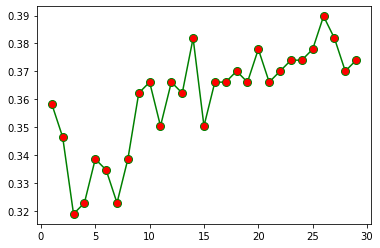

In [31]:
valores = range(1,30)
plt.plot(valores,tasa_error,color='green',marker='o',markerfacecolor='red',markersize=8)

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)                         
knn.fit(X_train,y_train)
prediccion_i = knn.predict(X_test)
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

         bus       0.82      0.84      0.83        77
        opel       0.48      0.37      0.42        65
        saab       0.38      0.40      0.39        57
         van       0.78      0.93      0.85        55

    accuracy                           0.64       254
   macro avg       0.62      0.64      0.62       254
weighted avg       0.63      0.64      0.63       254

